## Previsão de acidentes automobilisticos na India

O objetivo deste estudo e tentar predizer os próximos acidentes de veículos na India por estados, utilizando o estudo de séries temporais. Aplicando o modelo Prophet.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
dados = pd.read_csv("./data/accident_prediction_india.csv")
dados.head()                                

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


# Cidades

Presença de cidades:

<Axes: ylabel='City Name'>

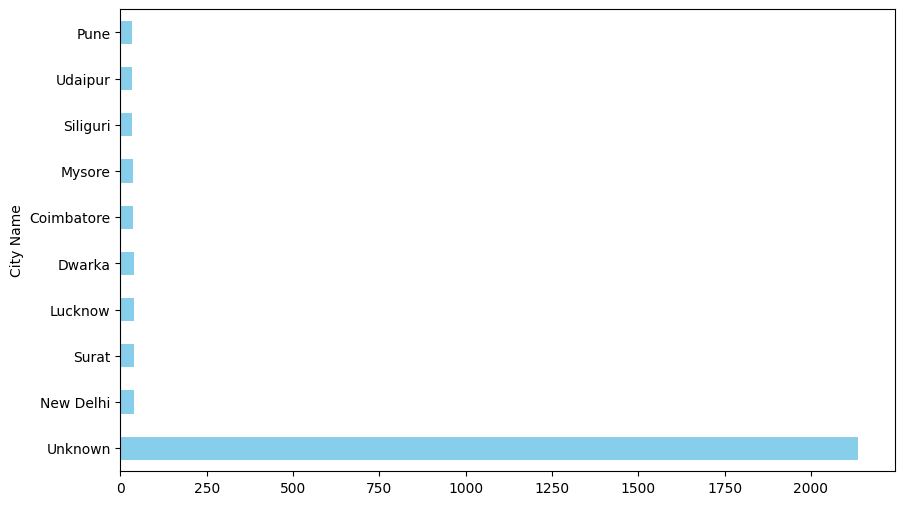

In [36]:
dados['City Name'].value_counts().head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')  

Presença baixa de cidades informadas, dado sem uso.

# Estados

Presença de estados:

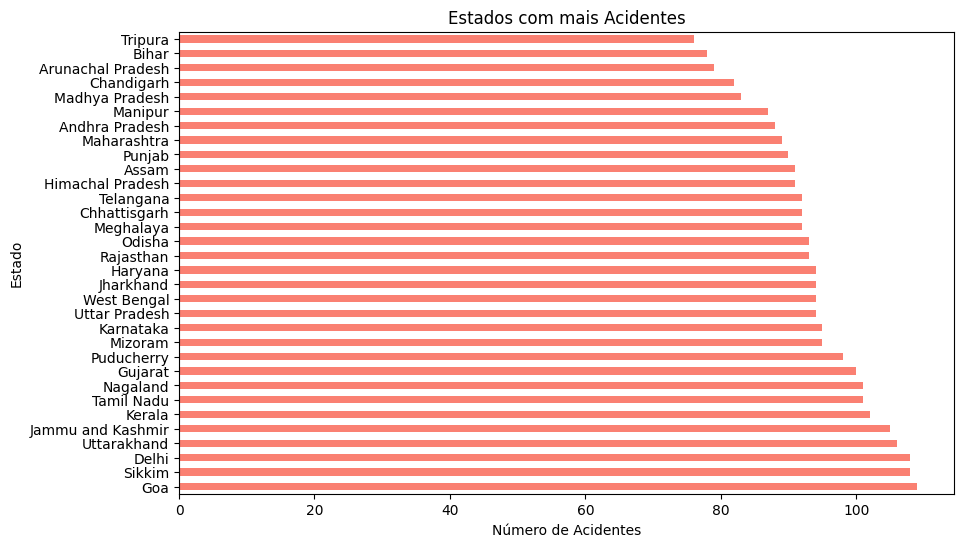

In [37]:
# Plotando os acidentes por cidade
plt.title('Estados com mais Acidentes')
dados['State Name'].value_counts().plot(kind='barh', figsize=(10, 6), color='salmon')
plt.xlabel('Número de Acidentes')
plt.ylabel('Estado')
plt.show()

# Cidades bem definidas e com bons valores por estados.

In [38]:
# TEMPORALIDADE DOS DADOS
# Verificando os anos disponíveis no dataset

dados['Year'].unique()

# dados de 2018 a 2023 sem furos.

array([2021, 2018, 2023, 2020, 2022, 2019])

In [39]:
# Verificando os meses disponíveis no dataset
print(f"Messes disponíveis:\n{dados['Month'].unique()}\n")
# Verificando os dias disponíveis no dataset
print(f"Dias da semana disponíveis:\n{dados['Day of Week'].unique()}")

Messes disponíveis:
['May' 'January' 'June' 'August' 'November' 'October' 'December' 'July'
 'April' 'September' 'February' 'March']

Dias da semana disponíveis:
['Monday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday' 'Friday' 'Sunday']


<Axes: ylabel='Accident Severity'>

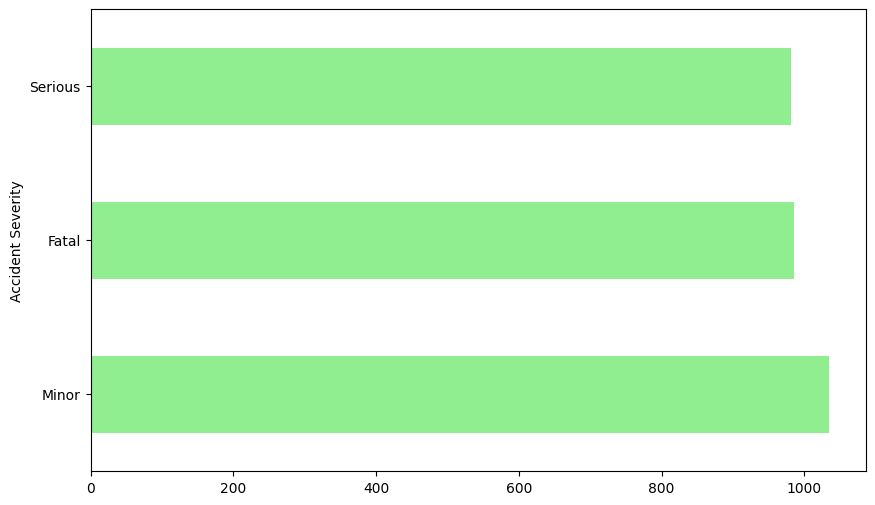

In [40]:
# Verificando os tipos de acidente por quantidade
dados['Accident Severity'].value_counts().plot(kind='barh', figsize=(10, 6), color='lightgreen')

# Quantidade bem dividida entre os tipos de acidente, mas com uma leve predominância de acidentes leves.

## Teste do Prophet

Teste do uso do prophet em variaveis categóricas

In [41]:
from prophet import Prophet

df_prophet = dados[['Year','Accident Severity']]
df_prophet.rename(columns={'Year': 'ds', 'Accident Severity': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')
# Minor = 1, Major = 2, Fatal = 3
df_prophet['y'] = df_prophet['y'].map({'Minor': 1, 'Major': 2, 'Fatal': 3})

df_prophet

C:\Users\marco\AppData\Local\Temp\ipykernel_21840\2571602750.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\marco\AppData\Local\Temp\ipykernel_21840\2571602750.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\marco\AppData\Local\Temp\ipykernel_21840\2571602750.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,ds,y
0,2021-01-01,NaN
1,2018-01-01,1.0
2,2023-01-01,1.0
3,2020-01-01,1.0
4,2021-01-01,1.0
...,...,...
2995,2021-01-01,1.0
2996,2018-01-01,3.0
2997,2021-01-01,1.0
2998,2023-01-01,3.0


In [42]:
modelo = Prophet()
modelo.fit(df_prophet)

17:30:24 - cmdstanpy - INFO - Chain [1] start processing
17:30:24 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future = modelo.make_future_dataframe(periods=365)
future.tail()

,ds
366,2023-12-28
367,2023-12-29
368,2023-12-30
369,2023-12-31
370,2024-01-01


            ds      yhat  yhat_lower  yhat_upper
366 2023-12-28  1.869177    0.538331    3.065424
367 2023-12-29  1.922849    0.610030    3.189691
368 2023-12-30  1.969376    0.756723    3.278107
369 2023-12-31  2.007865    0.737381    3.258930
370 2024-01-01  2.037572    0.831854    3.337969


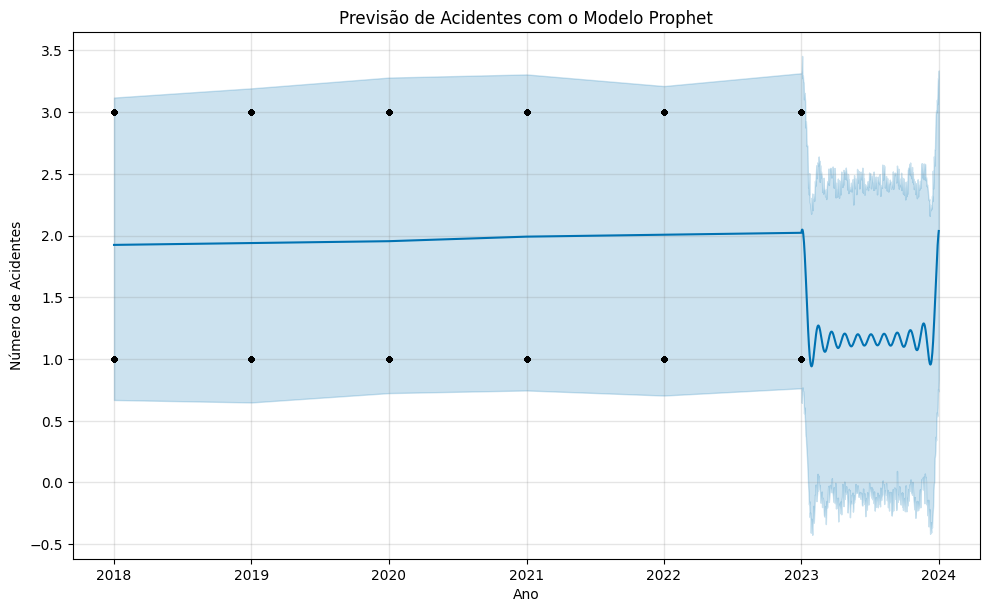

In [44]:
forecast = modelo.predict(future)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())
# Plotando os resultados
fig = modelo.plot(forecast)
plt.title('Previsão de Acidentes com o Modelo Prophet')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.show()

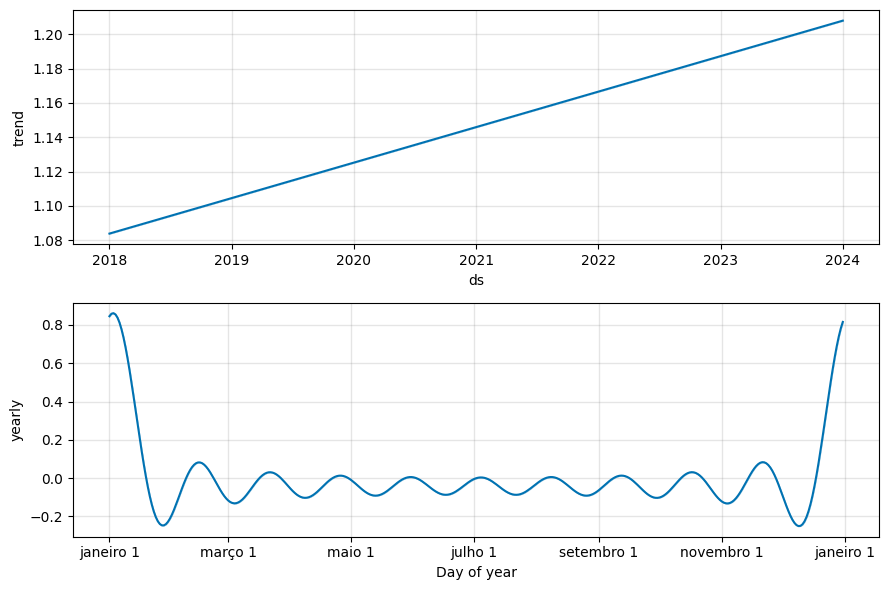

In [45]:
fig2 = modelo.plot_components(forecast)

In [46]:
# Criando um gráfico interativo com Plotly
import plotly.graph_objects as go

# Adicionando os dados reais
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_prophet['ds'], 
    y=df_prophet['y'], 
    mode='markers', 
    name='Dados Reais'
))

# Adicionando a previsão
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat'], 
    mode='lines', 
    name='Previsão'
))

# Adicionando os intervalos de confiança
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat_upper'], 
    mode='lines',
    line=dict(width=0),
    name='Limite Superior',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat_lower'], 
    mode='lines',
    line=dict(width=0),
    name='Limite Inferior',
    fill='tonexty', 
    fillcolor='rgba(0,100,80,0.2)',
    showlegend=True
))

# Configurando o layout
fig.update_layout(
    title='Previsão de Acidentes com Prophet (Gráfico Interativo)',
    xaxis_title='Ano',
    yaxis_title='Número de Acidentes',
    template='plotly_white'
)

# Exibindo o gráfico
fig.show()

O uso do Prophet neste modelo de teste demontra um erro não utilitário, como ele esta tentando definir categorias de forma temporal e não valores ele não encaixa neste padrão, agora o desafio será prever a gravidade do acidente.

## Random Florest